**Nilanjan Debnath Computer Vision Assignment 2 Roll Number:- MDS201919**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Question 1**

For part a), we define a function click_event which records the points we click on the image. Basically even without clicking, cv2 tracks mouse movements. When we click, it just prints the point where we clicked on the image.

In [4]:
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font, 
                    1, (255, 0, 0), 2) 
        cv2.imshow('image', img) 
  
    # checking for right mouse clicks      
    if event==cv2.EVENT_RBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        print(x, ' ', y) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        b = img[y, x, 0] 
        g = img[y, x, 1] 
        r = img[y, x, 2] 
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r), 
                    (x,y), font, 1, 
                    (255, 255, 0), 2) 
        cv2.imshow('image', img)

We now read the pictures and read the points that we click on for each of image 1 and 2. (We also read image 3 but since we don't need to know four point correspondances of image 3, we don't use click_event on it)

In [3]:
img1 = cv2.imread('Pictures/image1.jpg', 1)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image', img1)  
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [4]:
img2 = cv2.imread('Pictures/image2.jpg', 1)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image', img2)  
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [5]:
img3 = cv2.imread('Pictures/image3.jpg', 1)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image', img3)  
cv2.waitKey(0) 
cv2.destroyAllWindows() 

pts1 is the array with the 4 corners of the book in image 1.
Similarly, pts2 is the array with 4 corners of the book in image 2.

In [6]:
pts1 = np.array([[2728,124],[810,1225],[1695,2815],[3750,1479]])
pts2 = np.array([[3483,475],[1392,590],[1418,2178],[3682,2086]])

For part b), we first create a function returnhomography which, for each pair of points, creates the 2 corresponding rows of the matrix A, such that A x h = 0

In [5]:
def returnhomography(x1,y1,x2,y2):
    return([-x1,-y1,-1,0,0,0,x1*x2,y1*x2,x2],[0,0,0,-x1,-y1,-1,x1*y2,y1*y2,y2])

We output the matrix A. Now all we have to do is compute the SVD and take the last singular vector of the matrix V which we can write as the homography matrix h

In [8]:
firstupper,firstlower = returnhomography(2728,124,3483,475)
secondupper,secondlower = returnhomography(810,1225,1392,590)
thirdupper,thirdlower = returnhomography(1695,2815,1418,2178)
fourthupper,fourthlower = returnhomography(3750,1479,3682,2086)
A = np.matrix([firstupper,firstlower,secondupper,secondlower,thirdupper,thirdlower,fourthupper,fourthlower])
A

matrix([[   -2728,     -124,       -1,        0,        0,        0,
          9501624,   431892,     3483],
        [       0,        0,        0,    -2728,     -124,       -1,
          1295800,    58900,      475],
        [    -810,    -1225,       -1,        0,        0,        0,
          1127520,  1705200,     1392],
        [       0,        0,        0,     -810,    -1225,       -1,
           477900,   722750,      590],
        [   -1695,    -2815,       -1,        0,        0,        0,
          2403510,  3991670,     1418],
        [       0,        0,        0,    -1695,    -2815,       -1,
          3691710,  6131070,     2178],
        [   -3750,    -1479,       -1,        0,        0,        0,
         13807500,  5445678,     3682],
        [       0,        0,        0,    -3750,    -1479,       -1,
          7822500,  3085194,     2086]])

In [9]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
vh[8]

matrix([[ 5.04063543e-04, -2.50130363e-04,  8.60873251e-01,
          2.70864653e-04,  5.69373235e-04, -5.08818310e-01,
         -1.72780087e-08,  2.31032973e-08,  6.77328006e-04]])

vh[8] is the last singular vector of the matrix V. We use that as the homography H. We reshape the array to form a matrix.

In [10]:
arr = []
for i in vh[8].tolist()[0]:
    arr.append(i)
arr = np.array(arr)
arr = arr.reshape(3,3)
arr

array([[ 5.04063543e-04, -2.50130363e-04,  8.60873251e-01],
       [ 2.70864653e-04,  5.69373235e-04, -5.08818310e-01],
       [-1.72780087e-08,  2.31032973e-08,  6.77328006e-04]])

Next, for part (c) using the findhomography function of OpenCV, we find the homography matrix

In [12]:
h, status = cv2.findHomography(pts1,pts2,cv2.RANSAC)
h

array([[ 7.44194155e-01, -3.69289858e-01,  1.27098429e+03],
       [ 3.99901747e-01,  8.40616703e-01, -7.51214044e+02],
       [-2.55090717e-05,  3.41094670e-05,  1.00000000e+00]])

Now, we implement homography matrix on every pixel on image 1

Using the homography matrix we found by using the findhomography function

In [13]:
warp = cv2.warpPerspective(img1, h, (4000,3000))

In [14]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image',warp)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Using the homography matrix we found by using DLT algorithm

In [15]:
warp2 = cv2.warpPerspective(img1, arr, (4000,3000))

In [16]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image',warp)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Comparing the images. The first image is the original image2. The second image is the one we get by using findhomography. The third image is the one we get by using DLT algorithm.

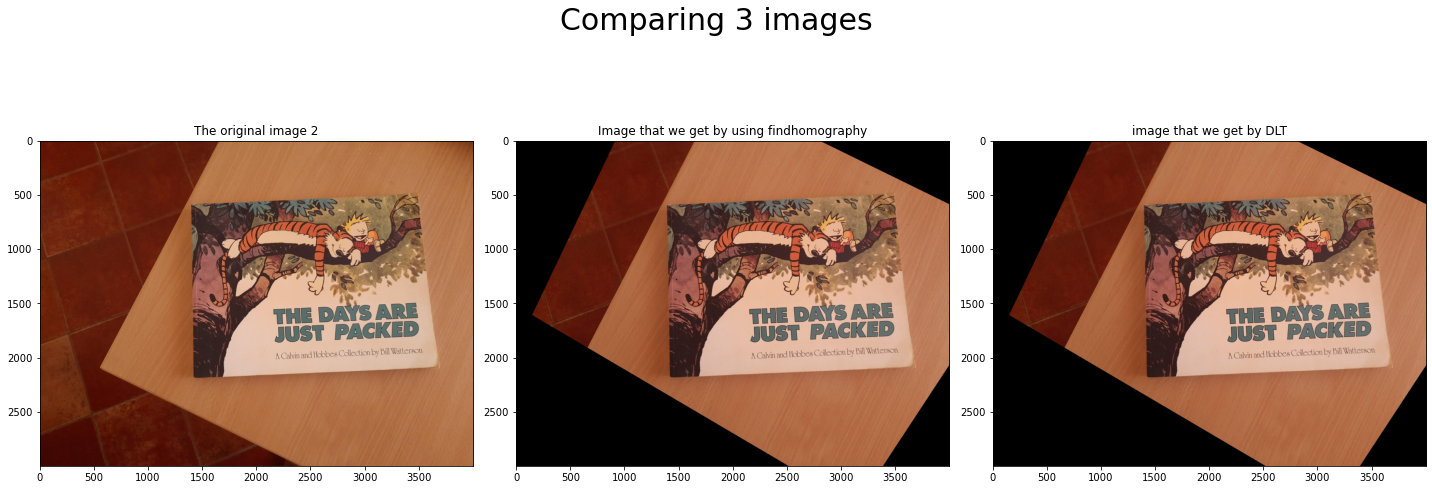

In [17]:
NUM_ROWS = 1
IMGs_IN_ROW = 3
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW,figsize = (20,8))

ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))
ax[2].imshow(cv2.cvtColor(warp2, cv2.COLOR_RGB2BGR))

ax[0].set_title('The original image 2')
ax[1].set_title('Image that we get by using findhomography')
ax[2].set_title('image that we get by DLT')
title = 'Comparing 3 images'
f.suptitle(title, fontsize=30)
plt.tight_layout()
plt.show()

1(d) Homography gives us black edges due to transformation of the image to another plane. Hence the image might look a bit tilted(revolution on an axis) and/or have black edges(due to rotation).

**Question 2**

First we select the 4 corners of the book. (We already have it from question 1).
Then we select 4 points which maintain the aspect ratio 30:23. Following the DLT algorithm, we get the matrix A.

In [18]:
firstupper,firstlower = returnhomography(2728,124,3650,200)
secondupper,secondlower = returnhomography(810,1225,200,200)
thirdupper,thirdlower = returnhomography(1695,2815,200,2845)
fourthupper,fourthlower = returnhomography(3750,1479,3650,2845)
A = np.matrix([firstupper,firstlower,secondupper,secondlower,thirdupper,thirdlower,fourthupper,fourthlower])

In [19]:
A

matrix([[   -2728,     -124,       -1,        0,        0,        0,
          9957200,   452600,     3650],
        [       0,        0,        0,    -2728,     -124,       -1,
           545600,    24800,      200],
        [    -810,    -1225,       -1,        0,        0,        0,
           162000,   245000,      200],
        [       0,        0,        0,     -810,    -1225,       -1,
           162000,   245000,      200],
        [   -1695,    -2815,       -1,        0,        0,        0,
           339000,   563000,      200],
        [       0,        0,        0,    -1695,    -2815,       -1,
          4822275,  8008675,     2845],
        [   -3750,    -1479,       -1,        0,        0,        0,
         13687500,  5398350,     3650],
        [       0,        0,        0,    -3750,    -1479,       -1,
         10668750,  4207755,     2845]])

Now we find the SVD and take the last singular vector from the matrix V

In [20]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
vh[8]

matrix([[ 5.80410080e-04, -3.16497255e-04,  8.81826596e-03,
          3.68327025e-04,  6.47230155e-04, -9.99960536e-01,
          2.12322110e-09,  3.16241358e-08,  4.15747091e-04]])

We reshape the vector to form the homography matrix

In [21]:
arr = []
for i in vh[8].tolist()[0]:
    arr.append(i)
arr = np.array(arr)
arr = arr.reshape(3,3)
arr

array([[ 5.80410080e-04, -3.16497255e-04,  8.81826596e-03],
       [ 3.68327025e-04,  6.47230155e-04, -9.99960536e-01],
       [ 2.12322110e-09,  3.16241358e-08,  4.15747091e-04]])

Using the homography matrix, we implement it on the image 1 and print the results.

In [22]:
warp = cv2.warpPerspective(img1, arr, (4000, 3000))

In [23]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image',warp)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

The first image is the original image. The second image is the image that we get by using DLT. The third image is the original image 3 to comparre between the two.

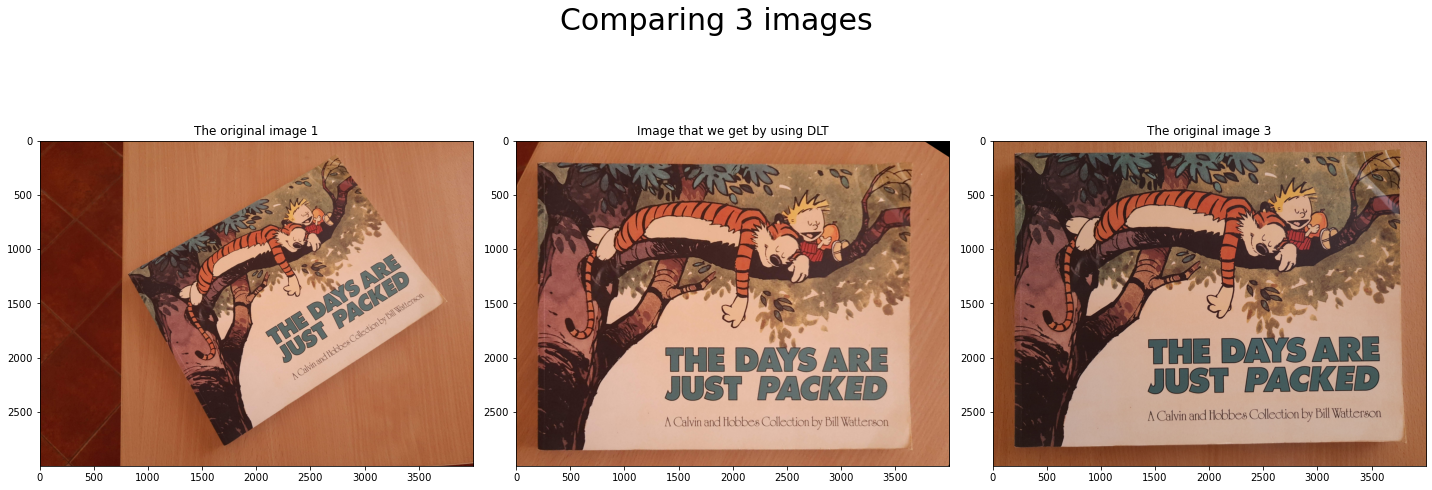

In [24]:
NUM_ROWS = 1
IMGs_IN_ROW = 3
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW,figsize = (20,8))

ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))
ax[2].imshow(cv2.cvtColor(img3, cv2.COLOR_RGB2BGR))

ax[0].set_title('The original image 1')
ax[1].set_title('Image that we get by using DLT')
ax[2].set_title('The original image 3')
title = 'Comparing 3 images'
f.suptitle(title, fontsize=30)
plt.tight_layout()
plt.show()

**Question 3**

Different use cases of homography:-
1) Rotation of an image

We read the third image as provided, then we rotate every pixel location by 90 degrees. (Like transposing a matrix).

In [6]:
img3 = cv2.imread('Pictures/image3.jpg', 1)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image', img3)
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [33]:
firstupper,firstlower = returnhomography(0,0,3000,0)
secondupper,secondlower = returnhomography(4000,0,3000,4000)
thirdupper,thirdlower = returnhomography(4000,3000,0,4000)
fourthupper,fourthlower = returnhomography(0,3000,0,0)
A = np.matrix([firstupper,firstlower,secondupper,secondlower,thirdupper,thirdlower,fourthupper,fourthlower])

Following the DLT algorithm, we get the matrix A.

In [34]:
A

matrix([[       0,        0,       -1,        0,        0,        0,
                0,        0,     3000],
        [       0,        0,        0,        0,        0,       -1,
                0,        0,        0],
        [   -4000,        0,       -1,        0,        0,        0,
         12000000,        0,     3000],
        [       0,        0,        0,    -4000,        0,       -1,
         16000000,        0,     4000],
        [   -4000,    -3000,       -1,        0,        0,        0,
                0,        0,        0],
        [       0,        0,        0,    -4000,    -3000,       -1,
         16000000, 12000000,     4000],
        [       0,    -3000,       -1,        0,        0,        0,
                0,        0,        0],
        [       0,        0,        0,        0,    -3000,       -1,
                0,        0,        0]])

Now we find the SVD and take the last singular vector from the matrix V

In [35]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
vh[8]

matrix([[-8.07730619e-18,  3.33333278e-04, -9.99999833e-01,
         -3.33333278e-04, -3.99533861e-18, -2.79477419e-14,
          1.56884054e-16, -5.35826266e-16, -3.33333278e-04]])

We reshape the vector to form the homography matrix

In [36]:
arr = []
for i in vh[8].tolist()[0]:
    arr.append(i)
arr = np.array(arr)
arr = arr.reshape(3,3)
arr

array([[-8.07730619e-18,  3.33333278e-04, -9.99999833e-01],
       [-3.33333278e-04, -3.99533861e-18, -2.79477419e-14],
       [ 1.56884054e-16, -5.35826266e-16, -3.33333278e-04]])

We now apply the homography to every point in the original image

In [37]:
warp = cv2.warpPerspective(img3, arr, (3000, 4000))

Now, we output the original image and the image that we got. We have the original image on the left side and on the right side, the image we got by rotating the original image. Rotation of an image is very useful in a lot of cases where a portrait image can be changed to landscape.

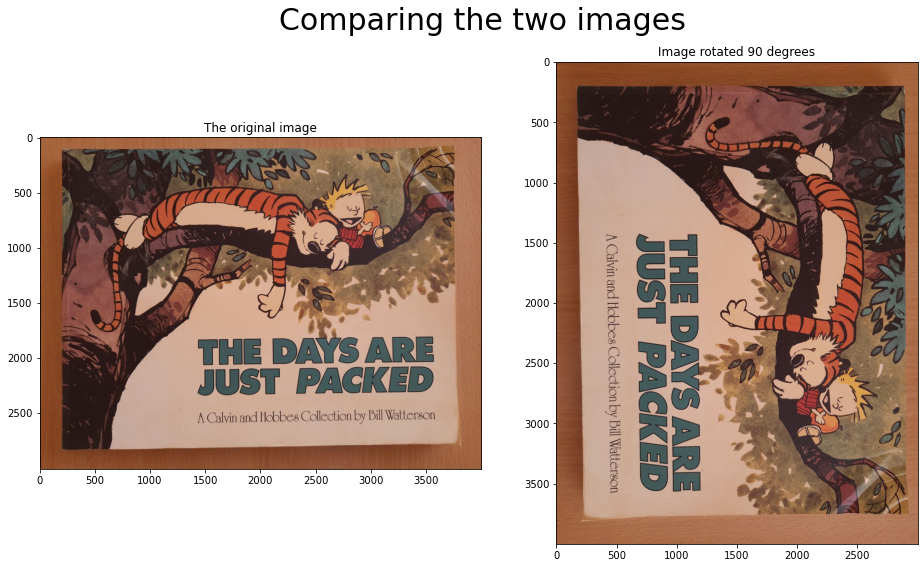

In [38]:
NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW,figsize = (13.5,8))

ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))


ax[0].set_title('The original image')
ax[1].set_title('Image rotated 90 degrees')
title = 'Comparing the two images'
f.suptitle(title, fontsize=30)
plt.tight_layout()
plt.show()

2) Rectifying perspective distortion

Here we first input the image of a window which has perspective distortion. We attain the end points of the window and map them to be a proper rectangle with the correct dimensions.

In [20]:
img4 = cv2.imread('Pictures/window.jpg', 1)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.imshow('image', img4)
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [21]:
firstupper,firstlower = returnhomography(76,103,76,53)
secondupper,secondlower = returnhomography(712,53,712,53)
thirdupper,thirdlower = returnhomography(77,575,77,612)
fourthupper,fourthlower = returnhomography(706,612,706,612)
A = np.matrix([firstupper,firstlower,secondupper,secondlower,thirdupper,thirdlower,fourthupper,fourthlower])

Using the DLT algorithm, we get the matrix A

In [22]:
A

matrix([[   -76,   -103,     -1,      0,      0,      0,   5776,   7828,
             76],
        [     0,      0,      0,    -76,   -103,     -1,   4028,   5459,
             53],
        [  -712,    -53,     -1,      0,      0,      0, 506944,  37736,
            712],
        [     0,      0,      0,   -712,    -53,     -1,  37736,   2809,
             53],
        [   -77,   -575,     -1,      0,      0,      0,   5929,  44275,
             77],
        [     0,      0,      0,    -77,   -575,     -1,  47124, 351900,
            612],
        [  -706,   -612,     -1,      0,      0,      0, 498436, 432072,
            706],
        [     0,      0,      0,   -706,   -612,     -1, 432072, 374544,
            612]])

Now we find the SVD and take the last singular vector from the matrix V

In [23]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
vh[8]

matrix([[-1.52778075e-02,  2.51067472e-06,  1.99138634e-01,
         -1.37518158e-03, -1.50079115e-02,  9.79658222e-01,
         -3.68767348e-06, -3.17702641e-08, -1.23706242e-02]])

We reshape the vector to form the homography matrix

In [24]:
arr = []
for i in vh[8].tolist()[0]:
    arr.append(i)
arr = np.array(arr)
arr = arr.reshape(3,3)
arr

array([[-1.52778075e-02,  2.51067472e-06,  1.99138634e-01],
       [-1.37518158e-03, -1.50079115e-02,  9.79658222e-01],
       [-3.68767348e-06, -3.17702641e-08, -1.23706242e-02]])

Now we apply the homography to every pixel in the original picture. What we get is the picture without any perspective distortion.

In [28]:
warp = cv2.warpPerspective(img4, arr, (768, 768))

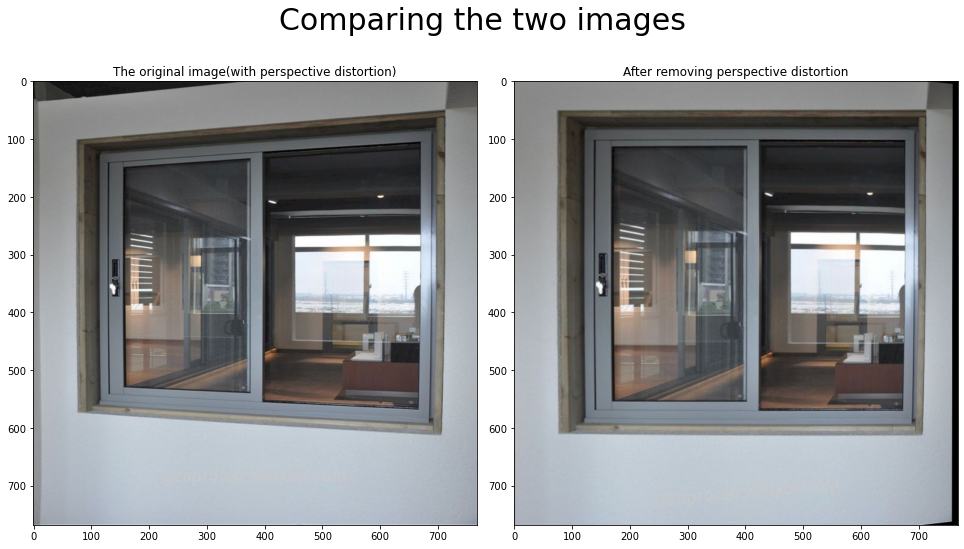

In [31]:
NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW,figsize = (13.5,8))

ax[0].imshow(cv2.cvtColor(img4, cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(warp, cv2.COLOR_RGB2BGR))


ax[0].set_title('The original image(with perspective distortion)')
ax[1].set_title('After removing perspective distortion')
title = 'Comparing the two images'
f.suptitle(title, fontsize=30)
plt.tight_layout()
plt.show()